참조 동영상 주소  
https://www.youtube.com/watch?v=Gz_PsRRxrHM

Deep Learning - Image Classification Tutorial step by step (for Beginners) (python / TensorFlow)

1. Image loading (four different methods)  
   (i)  Python Imaging Library  
   (ii) Open CV  
   (iii) IPython.display  
   (iv) Tensorflow.Keras API - Preprocessing  
2. Deep learning architectures  
    (i) Model Loading (MobileNet etc)  
    (ii) Predictions  
3. Decoding the predictions into labels

## 1.라이브러리 불러오기

In [2]:
import tensorflow as tf # pip install tensorflow
import numpy as np # pip install numpy

## 2. 이미지 불러오는 방법 2가지

#### First method to load an image

In [4]:
from IPython.display import Image # first method to read image

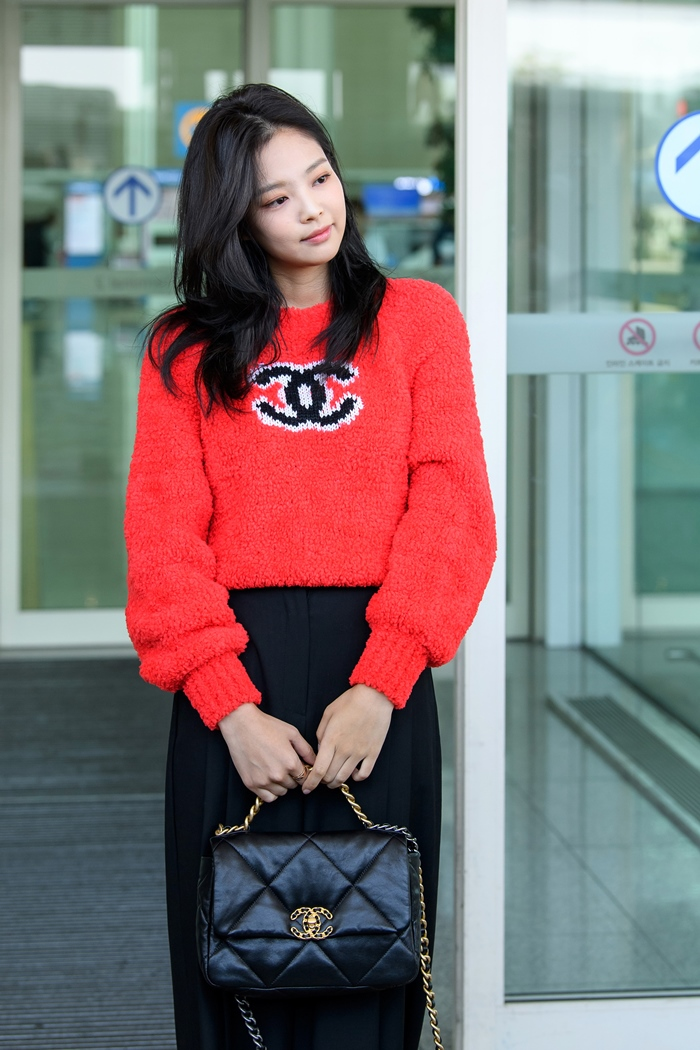

In [7]:
filename = "image_data/blackpink_channel.jpg"
Image(filename = filename, width=224, height=224)

#### Second method to loas on image

In [8]:
from tensorflow.keras.preprocessing import image

In [9]:
img = image.load_img(filename, target_size=(224,224))

In [10]:
import matplotlib.pyplot as plt # conda install -c conda-forge matplotlib

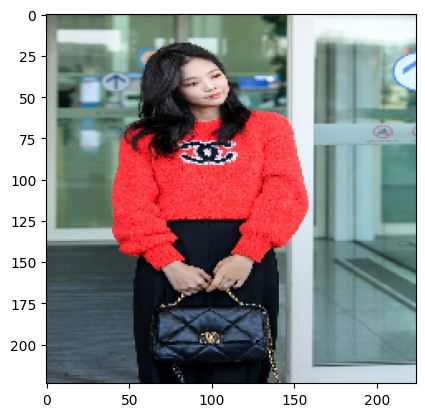

In [11]:
plt.imshow(img)

#### Third method to load as image

In [12]:
import cv2 # pip install opencv-python

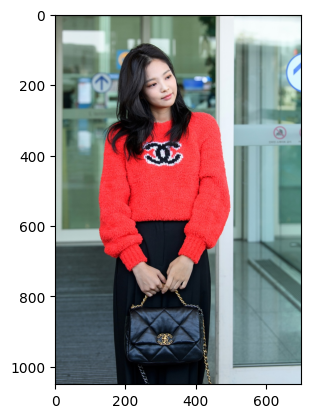

In [13]:
imgg = cv2.imread(filename)
# plt.imshow(imgg)
plt.imshow(cv2.cvtColor(imgg, cv2.COLOR_BGR2RGB)) #색 조정

#### Fourth method to load as image

In [14]:
from PIL import Image # pip install Pillow

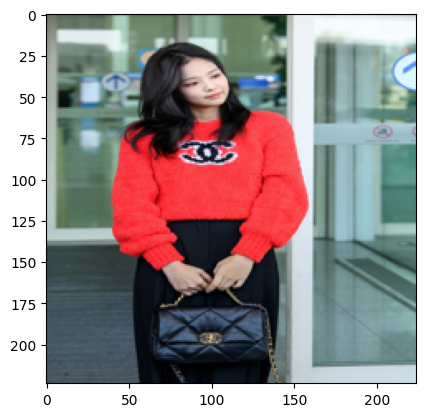

In [15]:
im = Image.open(filename)
im = im.resize((224,224))
plt.imshow(im)

## 1. Load the pre-trained model

In [16]:
# MobileNet 모델 불러오기
mobile = tf.keras.applications.MobileNet()

- Creating a model
- Training a model
- Test or Validate
- Predict

## 2.Pre-Processing of the image

In [17]:
from tensorflow.keras.preprocessing import image

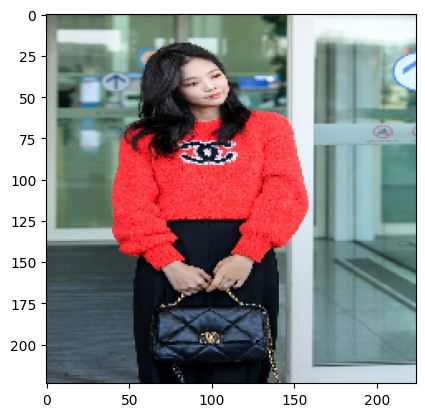

In [18]:
# 이미지 img에 저장
img = image.load_img(filename, target_size=(224,224))
plt.imshow(img)

In [25]:
# 이미지 array로 바꾸기
resized_img = image.img_to_array(img)

# 차원 늘려주기(224, 224, 3) → (1, 224, 224, 3)
final_image = np.expand_dims(resized_img, axis=0) # need fourth dimension
print(final_image.shape)

# tf.keras.applications.mobilenet.preprocess_input(x, data_format=None)
# x : array로 바뀐 이미지 / data_format : 이미지 텐서 / 배열의 선택적 데이터 형식
final_image = tf.keras.applications.mobilenet.preprocess_input(final_image)
print(final_image.shape)

(1, 224, 224, 3)
(1, 224, 224, 3)


## 3.임의의 이미지로 분류 예측하기

In [21]:
predictions = mobile.predict(final_image)
# print(predictions)

[[1.33719226e-07 6.81963499e-08 1.05632729e-07 1.64172653e-09
  4.89311915e-08 3.86776478e-08 1.45021473e-09 2.77404240e-07
  6.07970918e-08 2.62940905e-08 1.64932903e-08 7.69328992e-08
  1.28634481e-08 1.52956570e-09 8.40075884e-08 8.29082865e-08
  3.66185624e-08 1.20925779e-06 1.00252805e-06 4.13581276e-08
  3.63482222e-08 1.43801685e-07 1.45659911e-07 7.47182867e-07
  1.72787963e-07 1.52221276e-07 5.86092085e-07 8.33516538e-07
  5.66563983e-07 2.04664863e-09 8.66701521e-06 2.22469998e-06
  1.90226626e-06 1.22423103e-08 2.35664537e-08 8.43307987e-07
  7.95350417e-08 4.69178246e-07 8.30224963e-07 2.23847479e-07
  7.87505087e-07 7.61018537e-09 7.55830030e-08 5.93146126e-07
  1.18441903e-07 7.84920587e-07 7.75330705e-07 2.29290080e-07
  2.84970753e-07 1.22638880e-07 2.82527640e-06 3.42412818e-06
  1.25531437e-06 1.89070093e-07 3.54108380e-07 3.16067144e-07
  9.99791610e-07 1.18120242e-08 1.24996419e-07 7.95744597e-07
  8.40241046e-06 5.05075320e-07 1.71496296e-07 2.98935312e-08
  6.1964

## 4.예측 결과 확인하기

In [22]:
from tensorflow.keras.applications import imagenet_utils

In [27]:
# tf.keras.applications.imagenet_utils.decode_predictions(preds, top=5)
    # preds : Numpy array encoding a batch of predictions.
    # top : Integer, how many top-guesses to return. Defaults to 5.
    # Returns : A list of lists of top class prediction tuples (class_name, class_description, score). One list of tuples per sample in batch input.
results = imagenet_utils.decode_predictions(predictions, top=10)
print(results)

[[('n02963159', 'cardigan', 0.72353125), ('n04370456', 'sweatshirt', 0.21640518), ('n04325704', 'stole', 0.016190534), ('n03980874', 'poncho', 0.009472566), ('n03770439', 'miniskirt', 0.0045494926), ('n03775071', 'mitten', 0.002668977), ('n03124043', 'cowboy_boot', 0.0023513108), ('n03710637', 'maillot', 0.002136968), ('n03047690', 'clog', 0.0018616867), ('n03877472', 'pajama', 0.001623298)]]


## 5.이미지 확인하기

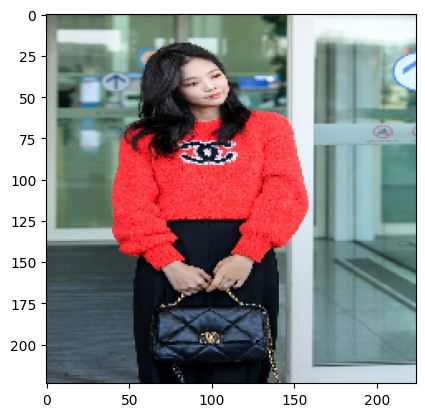

In [24]:
plt.imshow(img)